<a href="https://colab.research.google.com/github/tripathiosho/ImportantNotebooks/blob/main/Decision_tree_Practicals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 82.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 73.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 35.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 25.8MB/s]


In [ ]:
# import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    # X_train = pickle.load(handle)
    X_train = pd.read_pickle("preprocessed_X_sm.pickle")

with open('X_test.pickle', 'rb') as handle:
    # X_test = pickle.load(handle)
    X_test = pd.read_pickle("X_test.pickle")


with open('y_sm.pickle', 'rb') as handle:
    # y_train = pickle.load(handle)
    y_train = pd.read_pickle("y_sm.pickle")


with open('y_test.pickle', 'rb') as handle:
    # y_test = pickle.load(handle)
    y_test = pd.read_pickle("y_test.pickle")

In [ ]:
# train data shape
X_train.shape

import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
X_train

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,0.174089,2,9278,20763,3,1,16,3,4,0,15,3,3,5,4,0,1,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
1,21,546,5,1,0.127479,3,1,97,3,1,0.160714,4,3117,26009,1,0,18,3,3,0,3,2,3,2,2,2,2,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
2,43,422,1,3,0.151584,4,0,33,3,2,0.063158,4,5562,21782,4,0,13,3,2,1,12,2,2,5,2,2,2,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
3,42,188,29,3,0.127479,2,1,56,1,2,0.243386,4,4272,9558,4,0,19,3,1,0,16,3,3,1,0,0,0,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
4,35,992,1,3,0.127479,4,1,68,2,1,0.243386,1,2450,21731,1,0,19,3,2,0,3,3,3,3,0,1,2,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,41,1077,10,3,0.187471,2,1,85,2,2,0.128849,2,7541,13480,4,0,12,3,2,1,11,2,2,7,4,0,4,0.407817,0.592183,0.0,0.000000,0.407817,0.592183,0.592183,0.000000,0.407817
1844,55,310,7,1,0.239573,3,1,71,3,1,0.243683,2,2339,3667,7,0,11,3,3,0,13,3,1,9,8,8,7,0.000000,0.000000,1.0,0.000000,0.998141,0.001859,0.000000,0.998141,0.001859
1845,36,899,5,2,0.143813,1,0,92,2,1,0.160714,1,2190,20488,4,0,16,3,1,1,5,2,1,3,2,0,2,0.677643,0.322357,0.0,0.000000,1.000000,0.000000,0.677643,0.322357,0.000000
1846,40,292,7,3,0.151584,1,1,84,3,3,0.056921,3,12107,12915,5,0,11,3,4,2,18,3,2,16,7,10,5,0.192577,0.807423,0.0,0.000000,1.000000,0.000000,0.807423,0.192577,0.000000


In [ ]:
y_train

,Attrition
0,0
1,0
2,0
3,0
4,0
...,...
1843,1
1844,1
1845,1
1846,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
pred= tree_clf.predict(X_test)

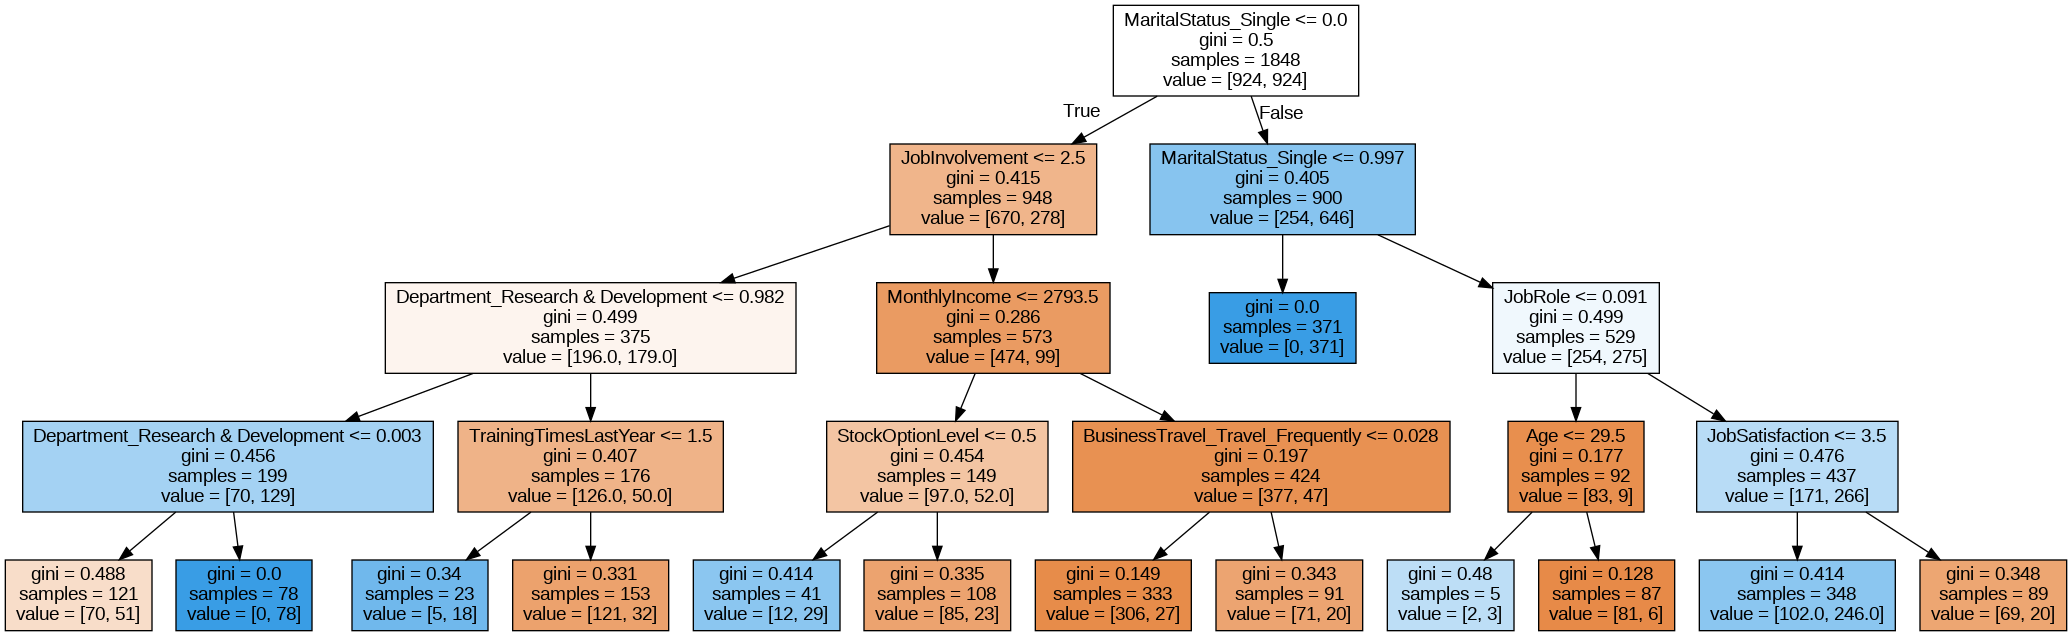

In [ ]:
#To visualize

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X_train.columns)

# Ensure the target variable 'Attrition' is not there in the feature list

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Text(0.5, 23.52222222222222, 'Predicted label')

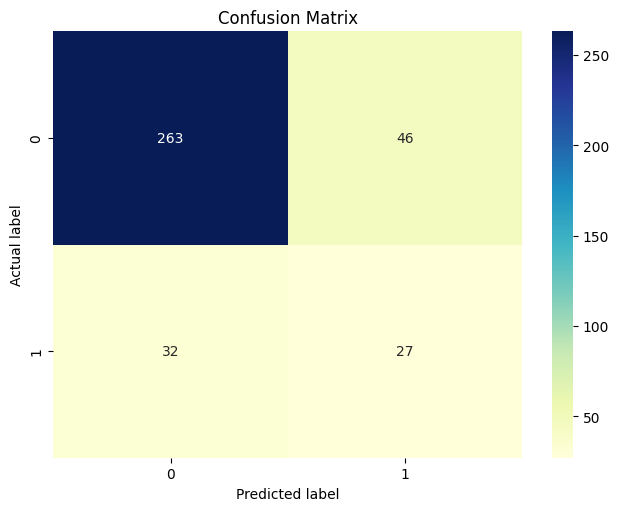

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()

#### create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [ ]:
pred= tree_clf.predict(X_test)

Text(0.5, 23.52222222222222, 'Predicted label')

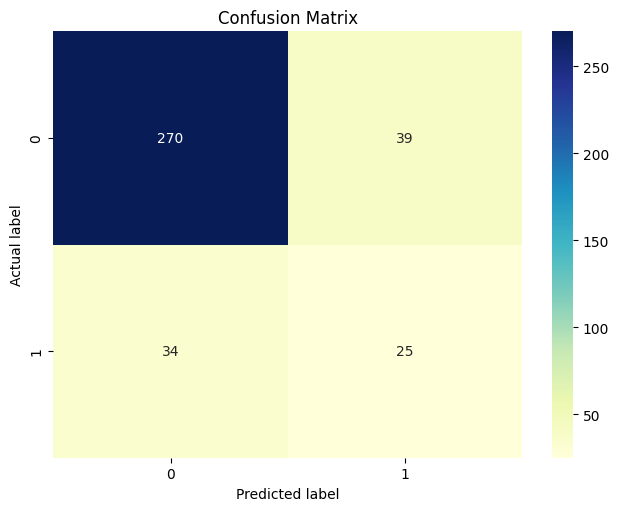

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()

#### create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
y_train.value_counts(normalize=True) *100

,proportion
Attrition,
0,50.0
1,50.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       309
           1       0.39      0.42      0.41        59

    accuracy                           0.80       368
   macro avg       0.64      0.65      0.64       368
weighted avg       0.81      0.80      0.80       368



In [ ]:
#support = count of true instances of each class

In [ ]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score

kfold = KFold(n_splits=10)

depths = [3,4,5,67,9,11,13,15]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv = kfold, scoring = 'accuracy', return_train_score = True)

    print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

K-Fold for depth:3 Accuracy Mean: Train: 78.23483177413387 Validation: 76.47326674500587
K-Fold for depth: 3 Accuracy Std: Train: 1.203088267164511 Validation: 11.331241420327677
K-Fold for depth:4 Accuracy Mean: Train: 83.50772540936214 Validation: 80.58049353701529
K-Fold for depth: 4 Accuracy Std: Train: 0.7889219949763586 Validation: 6.337951865133366
K-Fold for depth:5 Accuracy Mean: Train: 87.36180052847033 Validation: 81.88366627497062
K-Fold for depth: 5 Accuracy Std: Train: 0.7888615077334944 Validation: 7.73770036081666
K-Fold for depth:67 Accuracy Mean: Train: 100.0 Validation: 83.1316098707403
K-Fold for depth: 67 Accuracy Std: Train: 0.0 Validation: 10.55717457918392
K-Fold for depth:9 Accuracy Mean: Train: 97.31242628012397 Validation: 83.7256169212691
K-Fold for depth: 9 Accuracy Std: Train: 0.3868329573758325 Validation: 10.103313333296661
K-Fold for depth:11 Accuracy Mean: Train: 99.11012159443082 Validation: 83.02350176263221
K-Fold for depth: 11 Accuracy Std: Train: 

In [ ]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

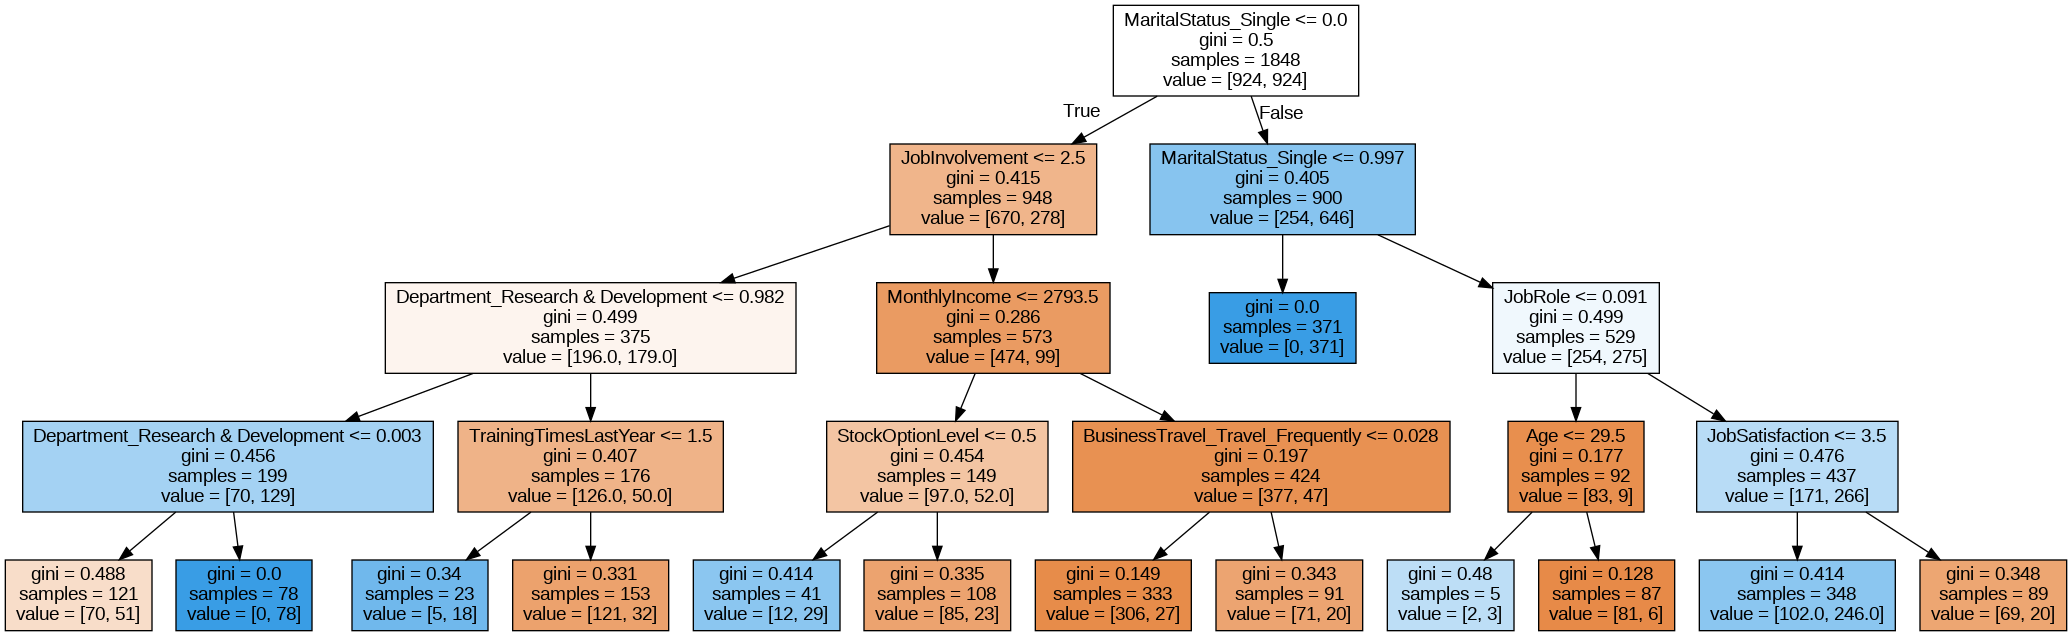

In [ ]:
#To visualize

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X_train.columns)

# Ensure the target variable 'Attrition' is not there in the feature list

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
pd.DataFrame(zip(X_train.columns, tree_clf.feature_importances_)).sort_values(by=1, ascending=False).rename(columns={0: 'columns', 1: 'feature importances'})

,columns,feature importances
35,MaritalStatus_Single,0.551861
31,Department_Research & Development,0.116828
8,JobInvolvement,0.086921
10,JobRole,0.082005
11,JobSatisfaction,0.068126
19,StockOptionLevel,0.030027
21,TrainingTimesLastYear,0.027184
12,MonthlyIncome,0.025852
28,BusinessTravel_Travel_Frequently,0.005684
0,Age,0.005513


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_validate
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

!gdown 176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO

Downloading...
From: https://drive.google.com/uc?id=176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO
To: /content/regData.csv
100% 13.4k/13.4k [00:00<00:00, 31.3MB/s]


In [ ]:
regression_data = pd.read_csv('regData.csv')

regression_data.head()

,X,Y
0,1,1.018138
1,2,0.813685
2,3,0.795484
3,4,0.860005
4,5,0.990648


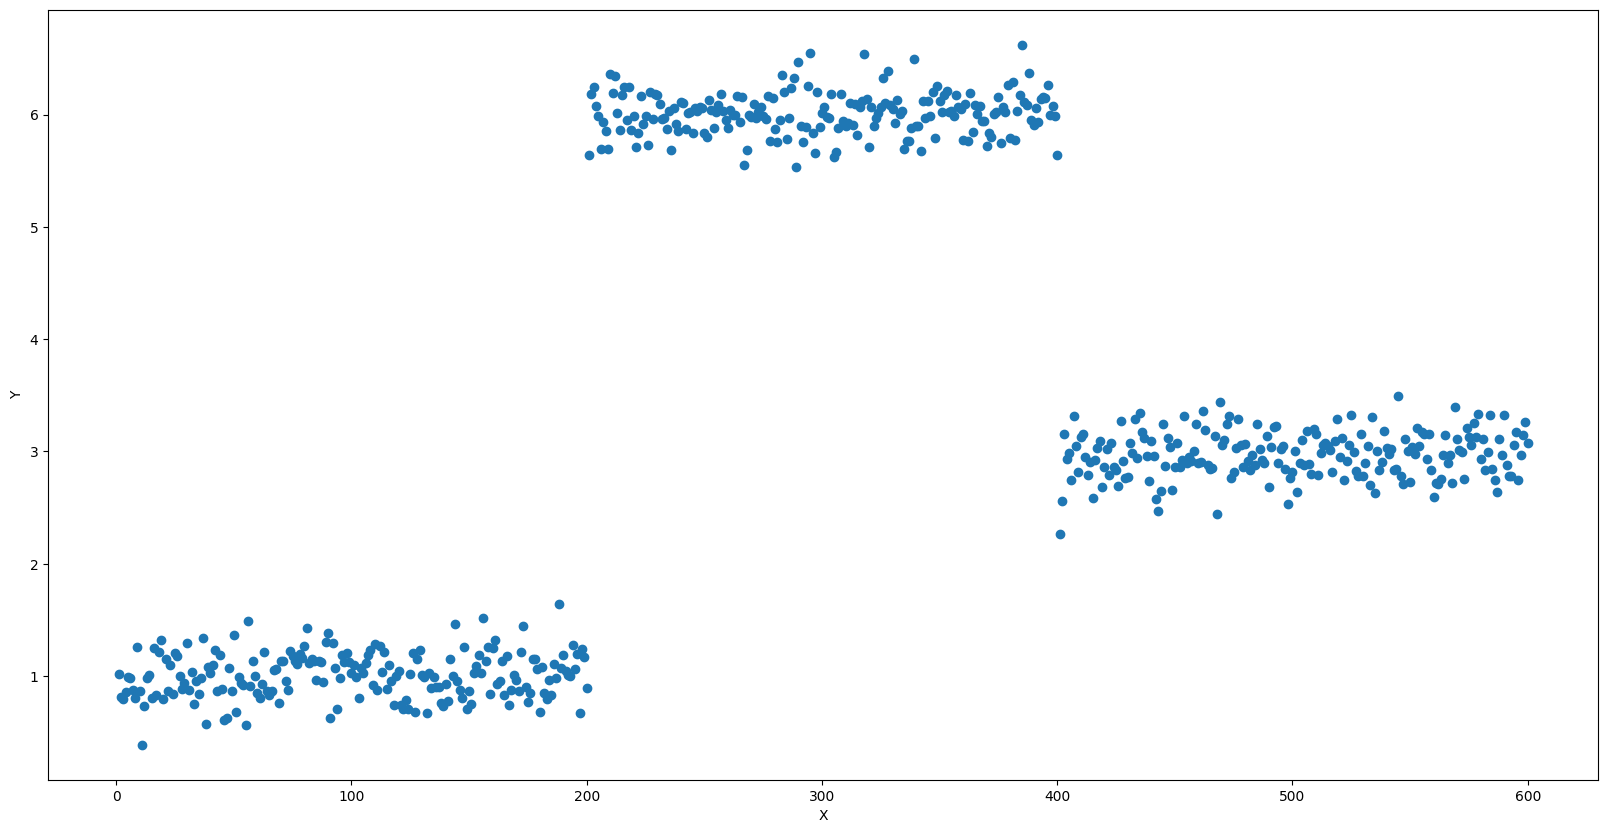

In [ ]:
X = regression_data['X']
y = regression_data['Y']

#### Plotting data

plt.figure(figsize = (20,10))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=43,
                                                    shuffle = True)

X_train = X_train.values.reshape(-1,1)

y_train = y_train.values

depths = [1,2,3,5,6,7,9,11]

for depth in depths:
    tree_reg = DecisionTreeRegressor(random_state=7, max_depth = depth, min_samples_split = 10, min_samples_leaf = 20)

    kfold = KFold(n_splits=3)
    # scoring is taken as negative mse as we maximize the scoring. maximizing negative MSE is same as minimizing MSE.
    cv_acc_results = cross_validate(tree_reg, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error', return_train_score = True)

    print(f"K-Fold for depth:{depth} -ve MSE Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print('***************')



K-Fold for depth:1 -ve MSE Mean: Train: -157.29484407813618 Validation: -161.85220982964185
***************
K-Fold for depth:2 -ve MSE Mean: Train: -4.022779524301007 Validation: -13.41631105078697
***************
K-Fold for depth:3 -ve MSE Mean: Train: -3.889896491712604 Validation: -13.530023054703413
***************
K-Fold for depth:5 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:6 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:7 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:9 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:11 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************


In [ ]:
features = list(regression_data.columns[0])

tree_reg = DecisionTreeRegressor(random_state=7, max_depth = 2, min_samples_split = 20 )
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_split=20, random_state=7)

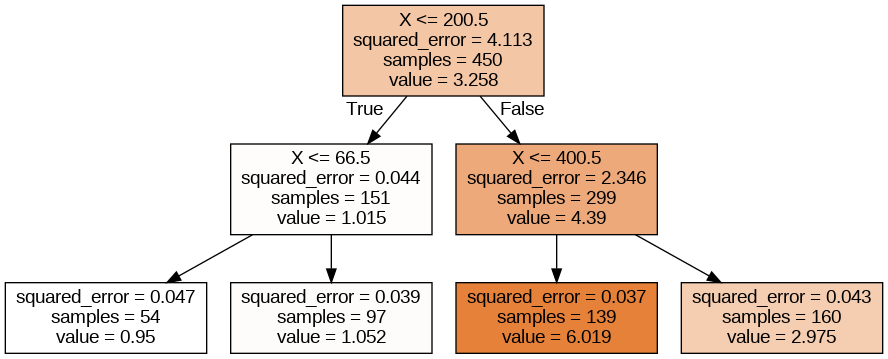

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

dot_data = StringIO()
export_graphviz(tree_reg, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())